# Project Name: 
- Pneumonia Detection Computer Vision Model
### Project Objectives: 
- Develop an cnn model that correctly classifies xray images as having a pneumonia.
### Data:
- The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

# Import Libraries

In [33]:
# Import Libraries
import pandas as pd
import numpy as np
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# packages for data augmentation and machine modeling
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.metrics import Precision, Recall

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
TRAIN_DATA_FOLDER = '/Users/eugene/Personal_Projects/Real_ML_Project/pneumonia_classification_cnn_model/pneumonia_model_package/pneumonia_model_package/datasets/pneumonia-data/train'
TEST_DATA_FOLDER = '/Users/eugene/Personal_Projects/Real_ML_Project/pneumonia_classification_cnn_model/pneumonia_model_package/pneumonia_model_package/datasets/pneumonia-data/test'
VAL_DATA_FOLDER = '/Users/eugene/Personal_Projects/Real_ML_Project/pneumonia_classification_cnn_model/pneumonia_model_package/pneumonia_model_package/datasets/pneumonia-data/val'

In [6]:
for i in os.listdir(TRAIN_DATA_FOLDER):
    if i != '.DS_Store':
        print(i)

PNEUMONIA
NORMAL


In [11]:
train_list = []
for class_folder_name in os.listdir(TRAIN_DATA_FOLDER):
    if class_folder_name != '.DS_Store':
        class_folder_path = os.path.join(TRAIN_DATA_FOLDER, class_folder_name)
        for image_path in glob(os.path.join(class_folder_path, "*.jpeg")):
            tmp = pd.DataFrame([image_path, class_folder_name]).T
            train_list.append(tmp)
# concatenate the final df
train_images_df = pd.concat(train_list, axis=0, ignore_index=True)
train_images_df.columns = ['image', 'label']
print(train_images_df.shape)
train_images_df.head(10)

(5216, 2)


,image,label
0,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
1,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
2,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
3,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
4,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
5,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
6,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
7,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
8,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
9,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA


In [17]:
val_list = []
for class_folder_name in os.listdir(VAL_DATA_FOLDER):
    if class_folder_name != '.DS_Store':
        class_folder_path = os.path.join(VAL_DATA_FOLDER, class_folder_name)
        for image_path in glob(os.path.join(class_folder_path, "*.jpeg")):
            tmp = pd.DataFrame([image_path, class_folder_name]).T
            val_list.append(tmp)
# concatenate the final df
val_images_df = pd.concat(val_list, axis=0, ignore_index=True)
val_images_df.columns = ['image', 'label']
print(val_images_df.shape)
val_images_df.head(10)

(16, 2)


,image,label
0,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
1,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
2,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
3,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
4,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
5,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
6,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
7,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
8,/Users/eugene/Personal_Projects/Real_ML_Projec...,NORMAL
9,/Users/eugene/Personal_Projects/Real_ML_Projec...,NORMAL


In [18]:
test_list = []
for class_folder_name in os.listdir(TEST_DATA_FOLDER):
    if class_folder_name != '.DS_Store':
        class_folder_path = os.path.join(TEST_DATA_FOLDER, class_folder_name)
        for image_path in glob(os.path.join(class_folder_path, "*.jpeg")):
            tmp = pd.DataFrame([image_path, class_folder_name]).T
            test_list.append(tmp)
# concatenate the final df
test_images_df = pd.concat(test_list, axis=0, ignore_index=True)
test_images_df.columns = ['image', 'label']
print(test_images_df.shape)
test_images_df.head(10)

(624, 2)


,image,label
0,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
1,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
2,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
3,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
4,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
5,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
6,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
7,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
8,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA
9,/Users/eugene/Personal_Projects/Real_ML_Projec...,PNEUMONIA


In [13]:
train_images_df['image'][5215]

'/Users/eugene/Personal_Projects/Real_ML_Project/pneumonia_classification_cnn_model/pneumonia_model_package/pneumonia_model_package/datasets/pneumonia-data/train/NORMAL/NORMAL2-IM-0960-0001.jpeg'

In [14]:
train_images_df['label'].value_counts()

label
PNEUMONIA    3875
NORMAL       1341
Name: count, dtype: int64

# Notice an occurence of class imbalance. we shall handle this later 

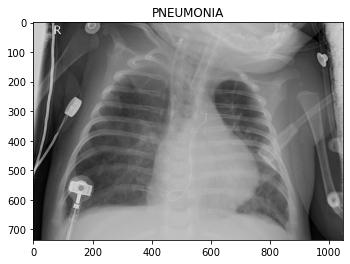

In [15]:
def plot_single_image(df, image_number):
    im = cv2.imread(df.loc[image_number, 'image'])
    plt.title(df.loc[image_number, 'label'])
    plt.imshow(im)
    
plot_single_image(train_images_df, 0)

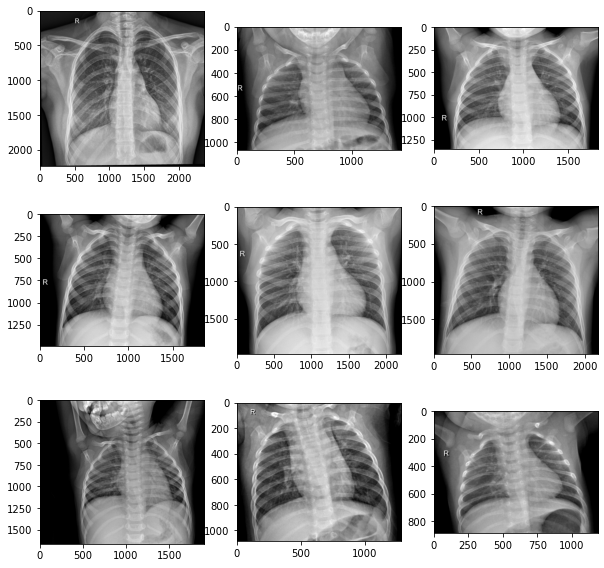

In [16]:

def plot_for_class(df, label):
    # function plots 9 images
    nb_rows = 3
    nb_cols = 3
    
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(10, 10))

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            tmp = df[df['label'] == label ]
            tmp.reset_index(drop=True, inplace=True)
            im = cv2.imread(tmp.loc[n, 'image'])          
            axs[i, j].imshow(im)
            n += 1 

plot_for_class(train_images_df, 'NORMAL')

# Image Resizing and Dataset Creation

In [20]:
batch_size = 32
image_shape = (150,150)

train_gen = ImageDataGenerator(preprocessing_function= preprocess_input)
test_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

train_ds = train_gen.flow_from_dataframe(
    train_images_df,
    target_size = image_shape,
    batch_size = batch_size,
    x_col = 'image',
    y_col = 'label',
    class_mode = 'categorical',
    shuffle = True,
    seed = 101
)

Found 5216 validated image filenames belonging to 2 classes.


In [21]:
test_ds = test_gen.flow_from_dataframe(
    test_images_df,
    target_size = image_shape,
    batch_size = batch_size,
    x_col = 'image',
    y_col = 'label',
    class_mode = 'categorical',
    shuffle = False,
    seed = 101
)

Found 624 validated image filenames belonging to 2 classes.


# Class Imbalance Rectification

In [31]:
# First obtain the count of each label
normal_count  = len(train_images_df[train_images_df['label']=='NORMAL'])
pneumonia_count  = len(train_images_df[train_images_df['label']=='PNEUMONIA'])
print(f'Total number of normal patient: {normal_count}; while total number of pneumonia patient: {pneumonia_count}')

Total number of normal patient: 1341; while total number of pneumonia patient: 3875


In [35]:
initial_bias = np.log([pneumonia_count / normal_count])
print("Initial bias: {:.5f}".format(initial_bias[0]))

TRAIN_IMG_COUNT = normal_count + pneumonia_count
weight_for_normal = (1 / normal_count) * (TRAIN_IMG_COUNT) / 2.0
weight_for_pneumonia = (1 / pneumonia_count) * (TRAIN_IMG_COUNT) / 2.0

class_weight = {0: weight_for_normal, 1: weight_for_pneumonia}

print("Weight for class 0: {:.2f}".format(weight_for_normal))
print("Weight for class 1: {:.2f}".format(weight_for_pneumonia))

Initial bias: 1.06113
Weight for class 0: 1.94
Weight for class 1: 0.67


# Model Development

In [22]:
def make_model(
        input_size, 
        learning_rate, 
        size_inner,
        droprate):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(2)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy',
                 Precision(),
                 Recall()]
    )
    
    return model

In [36]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_0_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

# Model Training

In [38]:
input_size = 150
learning_rate = 0.015
size = 128
droprate = 0.3

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=5, class_weight=class_weight, validation_data=test_ds,
                   callbacks=[checkpoint, early_stopping_cb])

Epoch 1/5


2024-05-24 03:29:06.818035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - ETA: 0s - loss: 0.7765 - accuracy: 0.8742 - precision_2: 0.7086 - recall_2: 0.8760

2024-05-24 03:30:53.164536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - 120s 716ms/step - loss: 0.7765 - accuracy: 0.8742 - precision_2: 0.7086 - recall_2: 0.8760 - val_loss: 0.5068 - val_accuracy: 0.8333 - val_precision_2: 0.6741 - val_recall_2: 0.9183
Epoch 2/5
163/163 [==============================] - 118s 725ms/step - loss: 0.1697 - accuracy: 0.9235 - precision_2: 0.8142 - recall_2: 0.9074 - val_loss: 0.4719 - val_accuracy: 0.8429 - val_precision_2: 0.6795 - val_recall_2: 0.9311
Epoch 3/5
163/163 [==============================] - 123s 754ms/step - loss: 0.1583 - accuracy: 0.9339 - precision_2: 0.8328 - recall_2: 0.9013 - val_loss: 0.3556 - val_accuracy: 0.8638 - val_precision_2: 0.7830 - val_recall_2: 0.8558
Epoch 4/5
163/163 [==============================] - 120s 736ms/step - loss: 0.1551 - accuracy: 0.9346 - precision_2: 0.8362 - recall_2: 0.9105 - val_loss: 0.5874 - val_accuracy: 0.8333 - val_precision_2: 0.8127 - val_recall_2: 0.8205
Epoch 5/5
163/163 [==============================] - 117s 715ms/step -

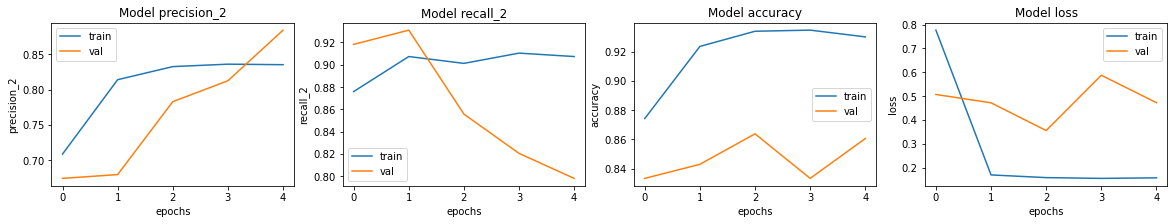

In [40]:
# visualize model performance
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(["precision_2", "recall_2", "accuracy", "loss"]):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history["val_" + met])
    ax[i].set_title("Model {}".format(met))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(met)
    ax[i].legend(["train", "val"])

# Predict and Evaluate Model

In [41]:
saved_model = keras.models.load_model('xception_v1_0_02_0.865.keras')

In [43]:
val_data = val_images_df.drop(['label'], axis=1)
val_data.head()

,image
0,/Users/eugene/Personal_Projects/Real_ML_Projec...
1,/Users/eugene/Personal_Projects/Real_ML_Projec...
2,/Users/eugene/Personal_Projects/Real_ML_Projec...
3,/Users/eugene/Personal_Projects/Real_ML_Projec...
4,/Users/eugene/Personal_Projects/Real_ML_Projec...


In [44]:
val_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

val_ds = val_gen.flow_from_dataframe(
    val_data,
    target_size = image_shape,
    batch_size = batch_size,
    x_col = 'image',
    class_mode = None,
    shuffle = False,
)

Found 16 validated image filenames.


In [46]:
pred = saved_model.predict(val_ds)
len(pred)
pred

2024-05-24 03:56:31.586912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 1s 1s/step


array([[ 2.230593  ,  0.31044832],
       [-1.2458014 ,  1.57584   ],
       [-3.6942298 ,  3.3334217 ],
       [-4.571746  ,  3.8513942 ],
       [-2.1134195 ,  2.0298307 ],
       [-1.2537282 ,  1.7482247 ],
       [ 2.378559  ,  0.3618512 ],
       [ 0.9146786 ,  0.8083195 ],
       [ 4.147621  , -0.55796576],
       [ 5.4519777 , -0.6750867 ],
       [ 3.2209861 ,  0.35904425],
       [ 1.7627147 , -0.20383099],
       [ 4.173661  , -1.1384004 ],
       [ 0.02663666,  1.5945133 ],
       [ 1.7174138 , -0.24677691],
       [ 3.5060775 , -0.21356691]], dtype=float32)

In [47]:
pred_index = pred.argmax(axis=1)
list(pred_index)

[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [50]:
train_labels = train_images_df['label']
train_labels.unique()

array(['PNEUMONIA', 'NORMAL'], dtype=object)

In [51]:
data_class = train_labels.unique()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data_class)
class_num = le.transform(data_class)
print(class_num)
class_dict = dict(zip(data_class, class_num))
class_dict

[1 0]


{'PNEUMONIA': 1, 'NORMAL': 0}

In [52]:
result = {value:key for key, value in class_dict.items()}
result_class =  [result[i] for i in pred_index]
result_class

['NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL']

In [61]:
actual_val_labels = val_images_df['label']


# converting our actual val class labels to arrays
def get_class_num(data):
    if data == 'NORMAL':
        return 0
    else:
        return 1
        

actual_values =  actual_val_labels.apply(lambda x: get_class_num(x))
actual_classes = np.array(actual_values)

In [62]:
from sklearn.metrics import  accuracy_score
accuracy_score(actual_classes, pred_index, normalize=True, sample_weight=None)

0.75